## Starting with the python scientific stack

https://www.scipy.org/getting-started.html & https://numpy.org/learn/ & https://www.astroml.org/


How are the pseudo random numbers are generated?

In [15]:
# the uniform distribution is implemented in scipy.stats.uniform
from scipy import stats
dist=stats.uniform(0,2) 
r=dist.rvs(10) #ten random draws
print(r)
p=dist.pdf(1) #pdf evaluated at 1
p

[1.10537221 1.51180984 0.91214909 1.66058512 1.24931465 1.80961756
 1.25177155 0.83438948 0.46354352 0.62659189]


0.5

In [16]:
import numpy as np
from astroML import stats
x=np.random.normal(size=1000)
stats.sigmaG(x)

1.0074548168425155

In [20]:
from astroML.datasets import fetch_sdss_sspp
data=fetch_sdss_sspp()
data.shape

(327260,)

In [21]:
!ls

sample_data


https://iopscience.iop.org/article/10.1088/0004-6256/136/5/2022

In [22]:
data.dtype.names[:5]

('ra', 'dec', 'Ar', 'upsf', 'uErr')

Text(0, 0.5, '$\\mathrm{log_{10} [g/(cm/s^2)]}$')

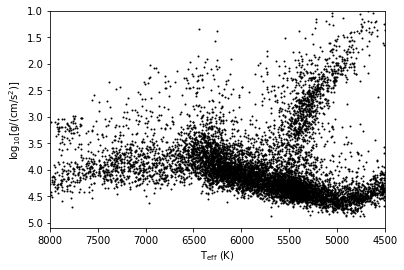

In [23]:
data=data[:10000]
rpsf=data['rpsf'] # some reasonable cuts
data=data[(rpsf > 15) & (rpsf<19)]
logg=data['logg']
Teff=data['Teff']
import matplotlib.pyplot as plt
ax=plt.axes()
ax.scatter(Teff, logg, s=4, lw=0, c='k')
ax.set_xlim(8000, 4500)
ax.set_ylim(5.1, 1)
ax.set_xlabel(r'$\mathrm{T_{eff} \ (K)}$')
ax.set_ylabel(r'$\mathrm{log_{10} [g/(cm/s^2)]}$')

Text(0, 0.5, 'Number')

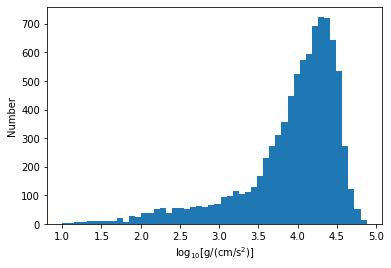

In [26]:
ax=plt.axes()
ax.hist(logg, bins=50)
ax.set_xlabel(r'$\mathrm{log_{10} [g/(cm/s^2)]}$')
ax.set_ylabel('Number')

Estimating CDF and PDF from real data samples
Given a bunch of measurementes from an experiment, one of the first steps is to visualize the CDF and PDF. The ECDF is quite useful for, say, visualizing how similar or different two sets of data are.

In [27]:
# Roll our own ECDF function

def ecdf(x):
    """Return empirical CDF of x."""

    sx = np.sort(x)
    cdf = (1.0 + np.arange(len(sx)))/len(sx)
    return sx, cdf

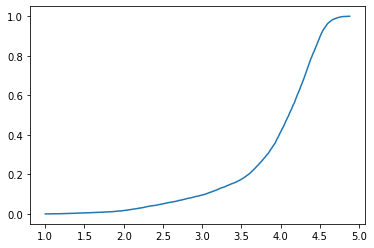

In [28]:
sx, y = ecdf(logg)
plt.plot(sx, y)
pass

# Pseudo Random Number Generation 
following The Nature of Mathematical Modelling by Neil Gershenfeld:
http://fab.cba.mit.edu/classes/864.20/index.html

Linear congruential random number generators, and more sophisticated variants, are the most common technique used for producing random numbers. The simplest example is the map $X_{n+1} = 2*X_{n} (mod 1)$|

In [29]:
def rng(m=1, a=2, c=0):
    rng.current = (a*rng.current + c) % m
    return rng.current/m

# setting the seed
rng.current = 0.427

In [30]:
test_list=[rng() for i in range(100)]
print("The original list : " + str(test_list))

The original list : [0.854, 0.708, 0.4159999999999999, 0.8319999999999999, 0.6639999999999997, 0.3279999999999994, 0.6559999999999988, 0.3119999999999976, 0.6239999999999952, 0.24799999999999045, 0.4959999999999809, 0.9919999999999618, 0.9839999999999236, 0.9679999999998472, 0.9359999999996944, 0.8719999999993888, 0.7439999999987776, 0.4879999999975553, 0.9759999999951106, 0.9519999999902211, 0.9039999999804422, 0.8079999999608845, 0.6159999999217689, 0.2319999998435378, 0.4639999996870756, 0.9279999993741512, 0.8559999987483025, 0.7119999974966049, 0.42399999499320984, 0.8479999899864197, 0.6959999799728394, 0.3919999599456787, 0.7839999198913574, 0.5679998397827148, 0.1359996795654297, 0.2719993591308594, 0.5439987182617188, 0.0879974365234375, 0.175994873046875, 0.35198974609375, 0.7039794921875, 0.407958984375, 0.81591796875, 0.6318359375, 0.263671875, 0.52734375, 0.0546875, 0.109375, 0.21875, 0.4375, 0.875, 0.75, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [31]:
res = [[test_list[i], test_list[i + 1]]
        for i in range(len(test_list) - 1)]
print("The consecutive element paired list is : " + str(res))

The consecutive element paired list is : [[0.854, 0.708], [0.708, 0.4159999999999999], [0.4159999999999999, 0.8319999999999999], [0.8319999999999999, 0.6639999999999997], [0.6639999999999997, 0.3279999999999994], [0.3279999999999994, 0.6559999999999988], [0.6559999999999988, 0.3119999999999976], [0.3119999999999976, 0.6239999999999952], [0.6239999999999952, 0.24799999999999045], [0.24799999999999045, 0.4959999999999809], [0.4959999999999809, 0.9919999999999618], [0.9919999999999618, 0.9839999999999236], [0.9839999999999236, 0.9679999999998472], [0.9679999999998472, 0.9359999999996944], [0.9359999999996944, 0.8719999999993888], [0.8719999999993888, 0.7439999999987776], [0.7439999999987776, 0.4879999999975553], [0.4879999999975553, 0.9759999999951106], [0.9759999999951106, 0.9519999999902211], [0.9519999999902211, 0.9039999999804422], [0.9039999999804422, 0.8079999999608845], [0.8079999999608845, 0.6159999999217689], [0.6159999999217689, 0.2319999998435378], [0.2319999998435378, 0.463999

In [32]:
import numpy as np
a = np.array(res)
x=a[:,0]
y=a[:,1]

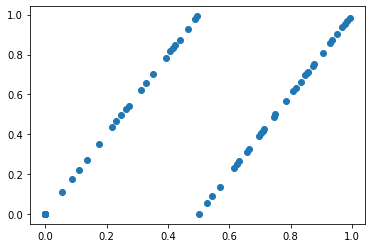

In [33]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

- Two things are immediately apparent: the points lie on two lines rather than being uniformly distributed (as they should be for two independent random numbers), and it doesn’t look like there are 100 points in the figure. 

- The first problem can easily be explained by looking back at the definition of the map, which shows that successive pairs of points lie on a line of slope 2, which gets wrapped around because of the mod operator. To understand the second problem, consider x written in a fractional binary expansion. Each iteration of this map shifts all the digits one place to the left, and throws out the digit
that crosses the binary point.

This bad example can be generalized to the class of maps
$$ x_{n+1} = a*x_{n} + b (mod c)$$ 
The value of a determines the slope of the lines that the points are on and how many lines there will be (a = 2 gave us 2 lines). 
We want this to be as large as possible, so that the lines fill the space as densely as possible. Then b and c must be chosen relative to a so that the period of the map is as long as possible (it doesn’t repeat after a few iterations), there are no fixed points that it can get stuck at, and the digits are otherwise as random
as they can be. Choosing optimal values for a, b, and c is a surprisingly subtle problem, but good choices have been worked out as a function of the machine word size used to represent x [Knuth, 1997]. https://www.youtube.com/watch?v=1IewbyuOVlI


In [34]:
# A much better choice could be
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a*rng.current + c) % m
    return rng.current/m

# setting the seed
rng.current = 1

In [35]:
test_list=[rng() for i in range(1000)]
print("The original list : " + str(test_list))

The original list : [0.25693503906950355, 0.5878706516232342, 0.15432575810700655, 0.767266943352297, 0.9738139626570046, 0.5858681506942958, 0.8511155843734741, 0.6132153405342251, 0.7473867232911289, 0.06236015981994569, 0.04194940160959959, 0.1948235605377704, 0.1386128985323012, 0.6840353596489877, 0.49171859584748745, 0.7676989699248224, 0.8828409514389932, 0.8232365751173347, 0.8835694054141641, 0.8901184604037553, 0.9114757110364735, 0.5759661465417594, 0.3127383701503277, 0.15734241367317736, 0.1734505402855575, 0.45860223821364343, 0.2598799681290984, 0.7005771037656814, 0.3033791915513575, 0.8927010844927281, 0.9657614398747683, 0.9349605368915945, 0.9332623495720327, 0.337260173400864, 0.8791998000815511, 0.7909467287827283, 0.1946238619275391, 0.6778173677157611, 0.6001160368323326, 0.41346341953612864, 0.7079516570083797, 0.23176096356473863, 0.4895814983174205, 0.06321822595782578, 0.10631834948435426, 0.4792256865184754, 0.8687314670532942, 0.7045282314065844, 0.89005653

In [36]:
res = [[test_list[i], test_list[i + 1]]
        for i in range(len(test_list) - 1)]

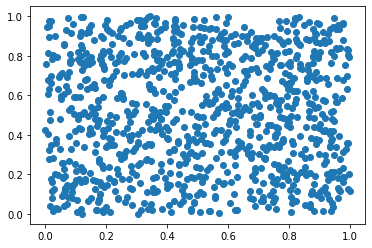

In [38]:
a = np.array(res)
x=a[:,0]
y=a[:,1]
plt.scatter(x,y)
plt.show()

This now appears to be much more random, and is adequate when there is a simple need for some numbers that “look” random.
This is still not a great generator, because **Q1** there is a certain period that you should find!

To further improve such a simple linear congruential generator, it is possible to add degrees of freedom by techniques such as running multiple generators in parallel and using them to shuffle entries in a large array [Press et al., 2007].

For a given LCRG $z_{i+1}=(az_{i}+c)$ mod m is valid the 
**Hull-Dobell Theorem**: The LCG will have a full period for all seeds if and only if:

- c and m are relatively prime,
- a−1 is divisible by all prime factors of m
- a−1 is a multiple of 4 if m is a multiple of 4.

The number $z_{0}$ is called the seed, and setting it allows us to have a reproducible sequence of “random” numbers. The LCG is typically coded to return z/m, a floating point number in (0, 1). This can be scaled to any other range (a,b). **Q2**: How?

Note that most PRNGs now use the ***Mersenne twister*** http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/ARTICLES/mt.pdf, but the LCG is presented because the LCG code much easier to understand and all we hope for is some appreciation for how apparently random sequences can be generated from a deterministic iterative scheme.

## https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html

# From standard uniform to other distributions

## Inverse transform method
Once we have standard uniform numbers, we can often generate random numbers from other distribution using the inverse transform method. Recall that if $X$ is a continuous random variable with CDF $F_{X}$, then $Y=F_{X}(X)$ has the standard uniform distribution.

Inverting this suggests that if $Y$ comes from a standard uniform distribution, then $F^{−1}_{X} (Y)$ has the same distribution as $X$. The inverse transform method is used below to generate random numbers from the exponential distribution.



In [39]:
def expon_pdf(x, lmabd=1):
    """PDF of exponential distribution."""
    return lmabd*np.exp(-lmabd*x)

In [40]:
def expon_cdf(x, lambd=1):
    """CDF of exponential distribution."""
    return 1 - np.exp(-lambd*x)

In [41]:
def expon_icdf(p, lambd=1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-p)/lambd

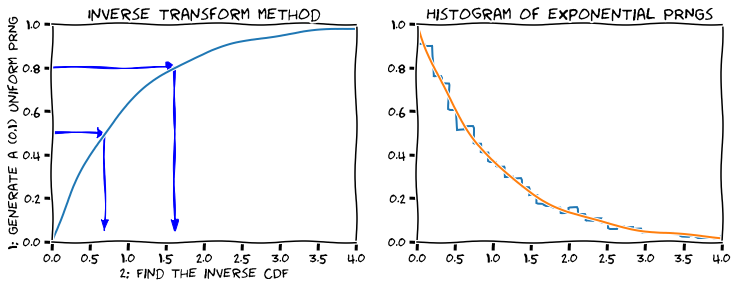

In [42]:
import scipy.stats as stats

dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

with plt.xkcd():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(x, expon_cdf(x))
    plt.axis([0, 4, 0, 1])
    for q in [0.5, 0.8]:
        plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
        plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
    plt.ylabel('1: Generate a (0,1) uniform PRNG')
    plt.xlabel('2: Find the inverse CDF')
    plt.title('Inverse transform method');

    plt.subplot(122)
    u = np.random.random(10000)
    v = expon_icdf(u)
    plt.hist(v, histtype='step', bins=100, density=True, linewidth=2)
    plt.plot(x, expon_pdf(x), linewidth=2)
    plt.axis([0,4,0,1])
    plt.title('Histogram of exponential PRNGs');

## Creating a random number generator for arbitrary distributions:

Suppose we have some random samples with an unknown distribution. We can still use the inverse transform method to create a random number generator from a random sample, by estimating the inverse CDF function using interpolation.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


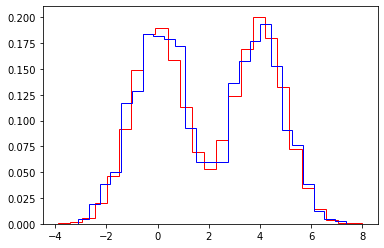

In [43]:
from scipy.interpolate import interp1d
from statsmodels.distributions.empirical_distribution import ECDF

# Make up some random data
x = np.concatenate([np.random.normal(0, 1, 10000),
                    np.random.normal(4, 1, 10000)])

ecdf = ECDF(x)
inv_cdf = interp1d(ecdf.y, ecdf.x, bounds_error=False, assume_sorted=True)
r = np.random.uniform(0, 1, 1000)
ys = inv_cdf(r)

plt.hist(x, 25, histtype='step', color='red', density=True, linewidth=1)
plt.hist(ys, 25, histtype='step', color='blue', density=True, linewidth=1);

In [44]:
?ECDF

In [45]:
## Rejection sampling (Accept-reject method)
 Suppose we want to sample from the (truncated) T distribution with
 10 degrees of freedom. We use the uniform as a proposal distibution 
 (highly inefficient).

IndentationError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


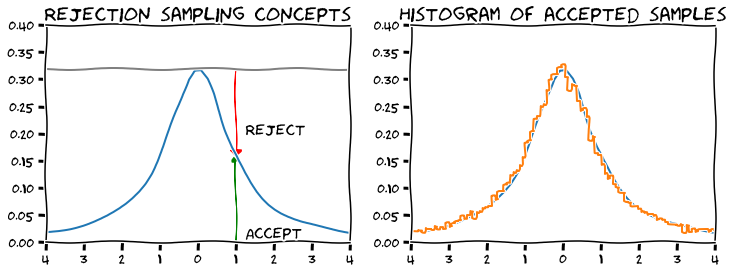

In [46]:
x = np.linspace(-4, 4)

df = 10
dist = stats.cauchy()
upper = dist.pdf(0)

with plt.xkcd():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(x, dist.pdf(x))
    plt.axhline(upper, color='grey')
    px = 1.0
    plt.arrow(px,0,0,dist.pdf(1.0)-0.01, linewidth=1,
              head_width=0.2, head_length=0.01, fc='g', ec='g')
    plt.arrow(px,upper,0,-(upper-dist.pdf(px)-0.01), linewidth=1,
              head_width=0.3, head_length=0.01, fc='r', ec='r')
    plt.text(px+.25, 0.2, 'Reject', fontsize=16)
    plt.text(px+.25, 0.01, 'Accept', fontsize=16)
    plt.axis([-4,4,0,0.4])
    plt.title('Rejection sampling concepts', fontsize=20)

    plt.subplot(122)
    n = 100000
    # generate from sampling distribution
    u = np.random.uniform(-4, 4, n)
    # accept-reject criterion for each point in sampling distribution
    r = np.random.uniform(0, upper, n)
    # accepted points will come from target (Cauchy) distribution
    v = u[r < dist.pdf(u)]

    plt.plot(x, dist.pdf(x), linewidth=2)

    # Plot scaled histogram
    factor = dist.cdf(4) - dist.cdf(-4)
    hist, bin_edges = np.histogram(v, bins=100, normed=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
    plt.step(bin_centers, factor*hist, linewidth=2)

    plt.axis([-4,4,0,0.4])
    plt.title('Histogram of accepted samples', fontsize=20);

## Rejection and importance sampling:
https://bookdown.org/rdpeng/advstatcomp/importance-sampling.html

## Mixture representations

Sometimes, the target distribution from which we need to generate random numbers
 can be expressed as a mixture of “simpler” distributions that we already know how
  to sample from:

$$f(x) = \int{g(x\,|\,y)p(y) dy}$$ 

For example, if y is drawn from the $\chi^{2}_{\nu}$ distribution, then $N(0,\nu/y)$ is a sample from the Student’s $T$ distribution with $\nu$ degrees of freedom.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


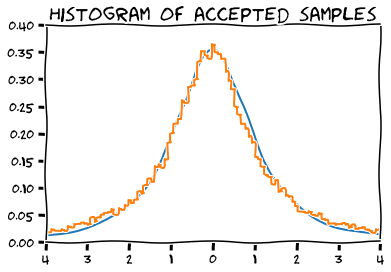

In [82]:
df = 2
dist = stats.t(df=df)
y = stats.chi2(df=df).rvs(n)
r = stats.norm(0, df/y).rvs(n)

with plt.xkcd():
    plt.plot(x, dist.pdf(x), linewidth=2)

    # Plot scaled histogram
    factor = dist.cdf(4) - dist.cdf(-4)
    hist, bin_edges = np.histogram(v, bins=100, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
    plt.step(bin_centers, factor*hist, linewidth=2)

    plt.axis([-4,4,0,0.4])
    plt.title('Histogram of accepted samples', fontsize=20);


## Box-Muller for generating normally distributed random numbers:

The Box-Muller transform starts with 2 random uniform numbers u and v - Generate an exponentially distributed variable r2 from u using the inverse transform method - This means that r is an exponentially distributed variable on (0,∞) - Generate a variable θ uniformly distributed on (0,2π) from v by scaling - In polar coordinates, the vector (r,θ) has an independent bivariate normal distribution - Hence the projection onto the x and y axes give independent univariate normal random numbers

For further details see here: https://blog.cupcakephysics.com/computational%20physics/2015/05/10/the-box-muller-algorithm.html

Note:

- Normal random numbers can also be generated using the general inverse transform method (e.g. by approximating the inverse CDF with a polynomial) or the rejection method (e.g. using the exponential distribution as the sampling distribution).

- There is also a variant of Box-Muller that does not require the use of (expensive) trigonometric calculations.

In [47]:
n = 1000
u1 = np.random.random(n)
u2 = np.random.random(n)
r_squared = -2*np.log(u1)
r = np.sqrt(r_squared)
theta = 2*np.pi*u2
x = r*np.cos(theta)
y = r*np.sin(theta)

https://seaborn.pydata.org/tutorial/distributions.html

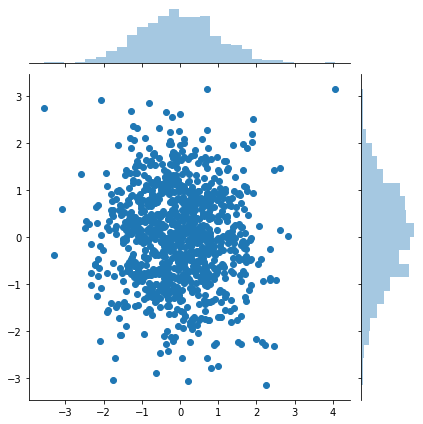

In [48]:
import seaborn as sns
sns.jointplot(x, y, kind='scatter')
pass

## Using the numpy.random and scipy.stats PRNGs

From this part onwards, we will assume that there is a library of PRNGs that we can use - either from numpy.random or scipy.stats which are both based on the Mersenne Twister, a high-quality PRNG for random integers. The numpy versions simply generate random deviates while the scipy versions will also provide useful functions related to the distribution, e.g. PDF, CDF and quantiles.

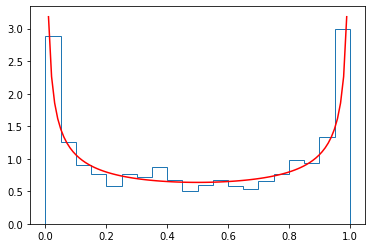

In [49]:
import numpy.random as rng

# Histogram of beta distribution
rs = rng.beta(a=0.5, b=0.5, size=1000)
plt.hist(rs, bins=20, histtype='step', density=True, linewidth=1)

# PDF for the beta distribution
xs = np.linspace(0, 1, 100)
plt.plot(xs, stats.beta.pdf(xs, a=0.5, b=0.5), color='red')
pass

In [50]:
%load_ext rpy2.ipython
# Full usage of R from python!

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [51]:
%%R

n <- 5
xs <- c(0.1, 0.5, 0.9)
print(dbeta(xs, 0.5, 0.5))
print(pbeta(xs, 0.5, 0.5))
print(qbeta(xs, 0.5, 0.5))
print(rbeta(n, 0.5, 0.5))

[1] 1.0610330 0.6366198 1.0610330
[1] 0.2048328 0.5000000 0.7951672
[1] 0.02447174 0.50000000 0.97552826
[1] 0.42136848 0.02219679 0.95128906 0.80121706 0.98775214


In [52]:
# Using scipy

n = 5
xs = [0.1, 0.5, 0.9]
rv = stats.beta(a=0.5, b=0.5)

print(rv.pdf(xs)) # equivalent of dbeta
print(rv.cdf(xs)) # equivalent of pbeta
print(rv.ppf(xs)) # equvialent of qbeta
print(rv.rvs(n)) # equivalent of rbeta

[1.06103295 0.63661977 1.06103295]
[0.20483276 0.5        0.79516724]
[0.02447174 0.5        0.97552826]
[0.78383553 0.06044613 0.19161202 0.38485651 0.97455739]


## Resampling and Monte Carlo Simulations¶

Broadly, any simulation that relies on random sampling to obtain results fall into the category of Monte Carlo methods. Another common type of statistical experiment is the use of repeated sampling from a data set, including the bootstrap, jackknife and permutation resampling. Often, they are combined, as when we use a random set of permutations rather than the full set of permutations, which grows as O(n!)) and is typically infeasible. What Monte Carlo simulations have in common is that they are typically more flexible but also more computationally demanding than methods based on asymptotic results. Because of their flexibility and the inexorable growth of computing power, I expect these computational simulation methods to only become more popular over time.

## Setting the random seed
In any probabilistic simulation, it is prudent to set the random number seed so that results can be replicated

### Sampling with and without replacement

In [104]:
# Sampling is done with replacement by default
np.random.choice(4, 12)

array([1, 3, 2, 3, 0, 2, 1, 3, 1, 1, 1, 1])

In [105]:
# Probability weights can be given
np.random.choice(4, 12, p=[.4, .1, .1, .4])

array([3, 3, 3, 0, 1, 1, 3, 2, 0, 0, 1, 0])

In [106]:
x = np.random.randint(0, 10, (8, 12))
x

array([[2, 5, 4, 5, 1, 0, 7, 8, 4, 3, 6, 8],
       [2, 5, 1, 7, 5, 5, 4, 1, 1, 8, 3, 6],
       [9, 1, 6, 4, 4, 4, 6, 1, 0, 9, 3, 4],
       [0, 0, 3, 3, 5, 6, 0, 1, 1, 4, 1, 6],
       [5, 6, 0, 0, 2, 6, 8, 0, 9, 5, 9, 4],
       [7, 7, 9, 6, 8, 6, 7, 1, 9, 0, 2, 0],
       [6, 6, 2, 8, 8, 3, 0, 6, 6, 6, 5, 5],
       [0, 2, 1, 4, 1, 2, 5, 0, 7, 2, 0, 4]])

In [107]:
# sampling individual elements
np.random.choice(x.ravel(), 12)

array([9, 1, 2, 6, 4, 3, 0, 1, 2, 5, 6, 6])

In [108]:
# sampling rows
idx = np.random.choice(x.shape[0], 4)
x[idx, :]

array([[7, 7, 9, 6, 8, 6, 7, 1, 9, 0, 2, 0],
       [9, 1, 6, 4, 4, 4, 6, 1, 0, 9, 3, 4],
       [2, 5, 4, 5, 1, 0, 7, 8, 4, 3, 6, 8],
       [5, 6, 0, 0, 2, 6, 8, 0, 9, 5, 9, 4]])

In [109]:
# sampling columns
idx = np.random.choice(x.shape[1], 4)
x[:, idx]

array([[8, 0, 6, 6],
       [1, 5, 3, 3],
       [1, 4, 3, 3],
       [1, 6, 1, 1],
       [0, 6, 9, 9],
       [1, 6, 2, 2],
       [6, 3, 5, 5],
       [0, 2, 0, 0]])

### Sampling without replacement

In [110]:
# Give the argument replace=False
try:
    np.random.choice(4, 12, replace=False)
except ValueError as e:
    print(e)

Cannot take a larger sample than population when 'replace=False'


### Random shuffling

In [111]:
x

array([[2, 5, 4, 5, 1, 0, 7, 8, 4, 3, 6, 8],
       [2, 5, 1, 7, 5, 5, 4, 1, 1, 8, 3, 6],
       [9, 1, 6, 4, 4, 4, 6, 1, 0, 9, 3, 4],
       [0, 0, 3, 3, 5, 6, 0, 1, 1, 4, 1, 6],
       [5, 6, 0, 0, 2, 6, 8, 0, 9, 5, 9, 4],
       [7, 7, 9, 6, 8, 6, 7, 1, 9, 0, 2, 0],
       [6, 6, 2, 8, 8, 3, 0, 6, 6, 6, 5, 5],
       [0, 2, 1, 4, 1, 2, 5, 0, 7, 2, 0, 4]])

In [112]:
# Shuffling occurs "in place" for efficiency
np.random.shuffle(x)
x

array([[2, 5, 1, 7, 5, 5, 4, 1, 1, 8, 3, 6],
       [7, 7, 9, 6, 8, 6, 7, 1, 9, 0, 2, 0],
       [5, 6, 0, 0, 2, 6, 8, 0, 9, 5, 9, 4],
       [9, 1, 6, 4, 4, 4, 6, 1, 0, 9, 3, 4],
       [0, 0, 3, 3, 5, 6, 0, 1, 1, 4, 1, 6],
       [6, 6, 2, 8, 8, 3, 0, 6, 6, 6, 5, 5],
       [2, 5, 4, 5, 1, 0, 7, 8, 4, 3, 6, 8],
       [0, 2, 1, 4, 1, 2, 5, 0, 7, 2, 0, 4]])

In [113]:
# To shuffle columns instead, transpose before shuffling
np.random.shuffle(x.T)
x

array([[2, 1, 5, 7, 5, 1, 3, 4, 5, 1, 8, 6],
       [7, 9, 6, 6, 8, 9, 2, 7, 7, 1, 0, 0],
       [5, 0, 6, 0, 2, 9, 9, 8, 6, 0, 5, 4],
       [9, 6, 4, 4, 4, 0, 3, 6, 1, 1, 9, 4],
       [0, 3, 6, 3, 5, 1, 1, 0, 0, 1, 4, 6],
       [6, 2, 3, 8, 8, 6, 5, 0, 6, 6, 6, 5],
       [2, 4, 0, 5, 1, 4, 6, 7, 5, 8, 3, 8],
       [0, 1, 2, 4, 1, 7, 0, 5, 2, 0, 2, 4]])

In [114]:
# numpy.random.permutation does the same thing but returns a copy
np.random.permutation(x)

array([[2, 1, 5, 7, 5, 1, 3, 4, 5, 1, 8, 6],
       [5, 0, 6, 0, 2, 9, 9, 8, 6, 0, 5, 4],
       [9, 6, 4, 4, 4, 0, 3, 6, 1, 1, 9, 4],
       [0, 1, 2, 4, 1, 7, 0, 5, 2, 0, 2, 4],
       [0, 3, 6, 3, 5, 1, 1, 0, 0, 1, 4, 6],
       [6, 2, 3, 8, 8, 6, 5, 0, 6, 6, 6, 5],
       [7, 9, 6, 6, 8, 9, 2, 7, 7, 1, 0, 0],
       [2, 4, 0, 5, 1, 4, 6, 7, 5, 8, 3, 8]])

## Estimating CDF and PDF from Monte Carlo samples
Given a bunch of random numbers from a simulation experiment, one of the first steps is to visualize the CDF and PDF. The ECDF is quite useful for, say, visualizing how similar or different two sets of data are.

In [115]:
# Make up some random data
x = np.r_[np.random.normal(0, 1, 10000),
          np.random.normal(4, 1, 10000)]

In [116]:
# Roll our own ECDF function

def ecdf(x):
    """Return empirical CDF of x."""

    sx = np.sort(x)
    cdf = (1.0 + np.arange(len(sx)))/len(sx)
    return sx, cdf

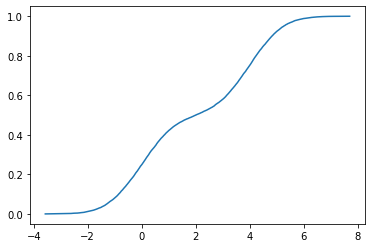

In [117]:
sx, y = ecdf(x)
plt.plot(sx, y)
pass

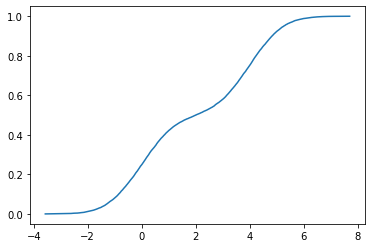

In [118]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(x)
plt.plot(ecdf.x, ecdf.y)
pass

## Estimating the PDF

The simplest is to plot a normalized histogram as shown above, but we will also look at how to estimate density functions using kernel density estimation (KDE). KDE works by placing a kernel unit on each data point, and summing the kernels to present a smoother estimate than you would get with a (n-d) histogram.

In [119]:
def epanechnikov(u):
    """Epanechnikov kernel."""
    return np.where(np.abs(u) <= np.sqrt(5), 3/(4*np.sqrt(5)) * (1 - u*u/5.0), 0)

def silverman(y):
    """Find bandwidth using heuristic suggested by Silverman
    .9 min(standard deviation, interquartile range/1.34)n−1/5
    """
    n = len(y)
    iqr = np.subtract(*np.percentile(y, [75, 25]))
    h = 0.9*np.min([y.std(ddof=1), iqr/1.34])*n**-0.2
    return h

def kde(x, y, bandwidth=silverman, kernel=epanechnikov):
    """Returns kernel density estimate.
    x are the points for evaluation
    y is the data to be fitted
    bandwidth is a function that returens the smoothing parameter h
    kernel is a function that gives weights to neighboring data
    """
    h = bandwidth(y)
    return np.sum(kernel((x-y[:, None])/h)/h, axis=0)/len(y)

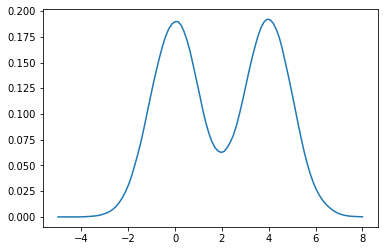

In [120]:
xs = np.linspace(-5,8,100)
density = kde(xs, x)
plt.plot(xs, density)
xlim = plt.xlim()
pass

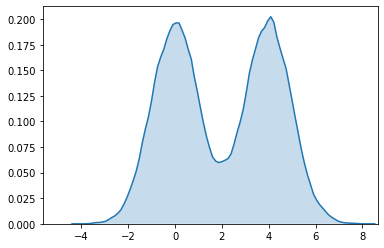

In [121]:
sns.kdeplot(x, kernel='epa', bw='silverman', shade=True)
plt.xlim(xlim)
pass

There are several kernel density estimation routines available in scipy, statsmodels and scikit-leran. Here we will use the scikits-learn and statsmodels routine as examples.

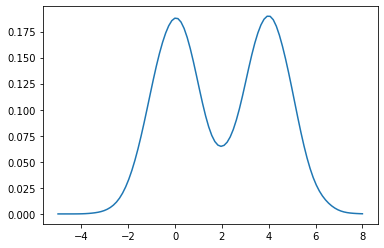

In [122]:
import statsmodels.api as sm

dens = sm.nonparametric.KDEUnivariate(x)
dens.fit(kernel='gau')
plt.plot(xs, dens.evaluate(xs))
pass

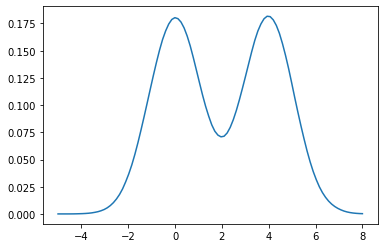

In [123]:
from sklearn.neighbors import KernelDensity

# expects n x p matrix with p features
x.shape = (len(x), 1)
xs.shape = (len(xs), 1)

kde = KernelDensity(kernel='epanechnikov').fit(x)
dens = np.exp(kde.score_samples(xs))
plt.plot(xs, dens)
pass

In [3]:
!pip install astroML

     |████████████████████████████████| 112kB 3.4MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp36-none-any.whl size=128663 sha256=ff60cf5f6cb9dd1b340d4d115ffa218eb4db8885e993d07db99bf2c0a47dce29
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML


In [5]:
!ls

sample_data
